# ProjectC - Terrain Identification from Time Series Data (Team 21)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from collections import Counter
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [21]:
path0 = r'TrainingData'
path1 = r'IntermediateData/'
path3 = r'SubjectFiles/'
path4 = r'FinalCombined/'
path5 = r'TestData'
path6 = r'TestIntermediateData/'
path7 = r'UploadResults/'

# Data Preprocessing
1. Merge files with time files
2. Merge with label files

In [22]:
x = glob.glob(path0 + "/subject_00*_*__x.csv")
y = glob.glob(path0 + "/subject_00*_*__y.csv")
x_time = glob.glob(path0 + "/subject_00*_*__x_time.csv")
y_time = glob.glob(path0 + "/subject_00*_*__y_time.csv")

print(sorted(x))
print(sorted(y))
print(sorted(x_time))
print(sorted(y_time))

['TrainingData\\subject_001_01__x.csv', 'TrainingData\\subject_001_02__x.csv', 'TrainingData\\subject_001_03__x.csv', 'TrainingData\\subject_001_04__x.csv', 'TrainingData\\subject_001_05__x.csv', 'TrainingData\\subject_001_06__x.csv', 'TrainingData\\subject_001_07__x.csv', 'TrainingData\\subject_001_08__x.csv', 'TrainingData\\subject_002_01__x.csv', 'TrainingData\\subject_002_02__x.csv', 'TrainingData\\subject_002_03__x.csv', 'TrainingData\\subject_002_04__x.csv', 'TrainingData\\subject_002_05__x.csv', 'TrainingData\\subject_003_01__x.csv', 'TrainingData\\subject_003_02__x.csv', 'TrainingData\\subject_003_03__x.csv', 'TrainingData\\subject_004_01__x.csv', 'TrainingData\\subject_004_02__x.csv', 'TrainingData\\subject_005_01__x.csv', 'TrainingData\\subject_005_02__x.csv', 'TrainingData\\subject_005_03__x.csv', 'TrainingData\\subject_006_01__x.csv', 'TrainingData\\subject_006_02__x.csv', 'TrainingData\\subject_006_03__x.csv', 'TrainingData\\subject_007_01__x.csv', 'TrainingData\\subject_0

In [23]:
files_list = []
subjects_list = []

for filename in sorted(x):
    file = filename[:-7]
    files_list.append(file)

for subject in files_list:
    file = subject.split('\\')[1]
    subjects_list.append(file)

print(files_list)
print(subjects_list)

['TrainingData\\subject_001_01', 'TrainingData\\subject_001_02', 'TrainingData\\subject_001_03', 'TrainingData\\subject_001_04', 'TrainingData\\subject_001_05', 'TrainingData\\subject_001_06', 'TrainingData\\subject_001_07', 'TrainingData\\subject_001_08', 'TrainingData\\subject_002_01', 'TrainingData\\subject_002_02', 'TrainingData\\subject_002_03', 'TrainingData\\subject_002_04', 'TrainingData\\subject_002_05', 'TrainingData\\subject_003_01', 'TrainingData\\subject_003_02', 'TrainingData\\subject_003_03', 'TrainingData\\subject_004_01', 'TrainingData\\subject_004_02', 'TrainingData\\subject_005_01', 'TrainingData\\subject_005_02', 'TrainingData\\subject_005_03', 'TrainingData\\subject_006_01', 'TrainingData\\subject_006_02', 'TrainingData\\subject_006_03', 'TrainingData\\subject_007_01', 'TrainingData\\subject_007_02', 'TrainingData\\subject_007_03', 'TrainingData\\subject_007_04', 'TrainingData\\subject_008_01']
['subject_001_01', 'subject_001_02', 'subject_001_03', 'subject_001_04'

In [24]:
for filename in files_list:
    subject=filename.split('\\')[1]
    df1=pd.read_csv(filename+'__x.csv',  names =['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
    df2=pd.read_csv(filename+'__x_time.csv', names =['time'])
    df1['time']=df2['time']
    df1['time']=df1['time'].apply(lambda x:int(x*100)/100)
    df1['time']=df1['time'].astype(str)
    df3=pd.read_csv(filename+'__y.csv', names =['label'])
    df4=pd.read_csv(filename+'__y_time.csv', names =['time'])
    df3['time']=df4['time']
    df3['time']=df3['time'].astype(str)
    df1.to_csv(path1+subject+'x_comb_time.csv',index=False)
    df3.to_csv(path1+subject+'y_label_time.csv',index=False)

for subject in subjects_list:
    df1 = pd.read_csv(path1+subject+'x_comb_time.csv')
    df2 = pd.read_csv(path1+subject+'y_label_time.csv')
    df3 = pd.merge(df1, df2, on='time', how='outer')
    df3.to_csv(path3+subject+'final.csv',index=False)
    df3['label']=df3['label'].interpolate(method='pad')
    df4 = df3.loc[df3['time']!=0]
    df4.to_csv(path4+subject+'_interpolatedfile.csv',index=False)

In [25]:
li=[]
all_files = glob.glob(path4 + "*.csv")
for files in sorted(all_files):
    df = pd.read_csv(files, names =['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z','time','label'])
    li.append(df)
    
df1 = pd.concat(li, axis=0, ignore_index=True)
df2 = df1.loc[df1['acc_x']!='acc_x']
df2.to_csv('FinalDataFile.csv',index=False)

C:\Users\Mihir\AppData\Local\Temp\ipykernel_15736\923309707.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(files, names =['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z','time','label'])
C:\Users\Mihir\AppData\Local\Temp\ipykernel_15736\923309707.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(files, names =['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z','time','label'])


1006897 55216 73068 206436


C:\Users\Mihir\AppData\Local\Temp\ipykernel_15736\240846037.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


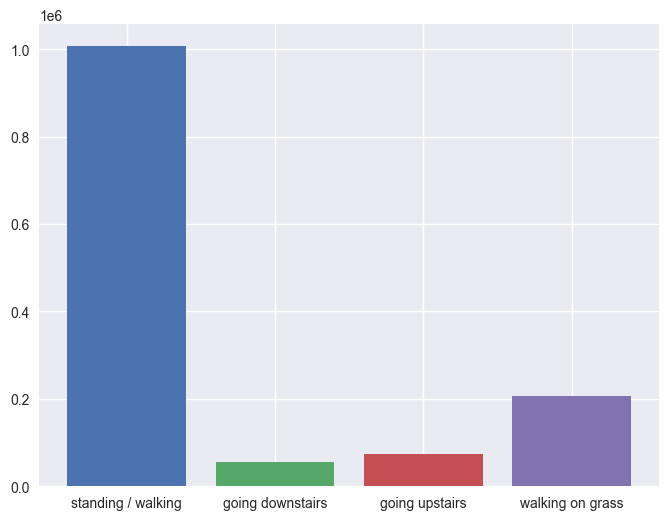

In [26]:
df=pd.read_csv('FinalDataFile.csv')
grass_full = df[df.label==3].count()[0]
upstairs_full = df[df.label==2].count()[0]
downstairs_full = df[df.label==1].count()[0]
walking_full = df[df.label==0].count()[0]
print(grass_full, downstairs_full, upstairs_full, walking_full)

text = ["standing / walking", "going downstairs","going upstairs", "walking on grass"]
label = [walking_full, downstairs_full, upstairs_full, grass_full]
plt.style.use('seaborn')
plt.figure(figsize=(8,6),dpi=100)
for bar in range(0,4):
    plt.bar(text[bar],label[bar])

In [27]:
y_train = df.label
x_train= df.drop('label', axis=1)
print(x_train)
print(y_train)

            acc_x     acc_y     acc_z    gyro_x    gyro_y    gyro_z     time
0        4.186920  8.344455  2.908057  0.005771 -0.004480 -0.003345     0.02
1        4.544637  8.408659  2.890000  0.007967  0.022412  0.001159     0.05
2        4.849308  8.411614  2.900692  0.027778 -0.010670 -0.014223     0.07
3        4.509190  8.118649  2.847298  0.021577 -0.045498 -0.021111     0.10
4        4.226515  8.273807  2.851742  0.012534  0.000445 -0.016830     0.12
...           ...       ...       ...       ...       ...       ...      ...
1341612  2.072244  8.908878 -3.500000  0.001351  0.001191  0.001031  1203.32
1341613  2.085123  8.915123 -3.520000  0.001918 -0.001147  0.000000  1203.34
1341614  2.083774  8.910000 -3.538981 -0.002015 -0.004099  0.001042  1203.37
1341615  2.111447  8.908553 -3.535724  0.000183 -0.001673  0.001856  1203.40
1341616  2.087730  8.900000 -3.518865  0.000052 -0.001267  0.000000  1203.42

[1341617 rows x 7 columns]
0          0.0
1          0.0
2          0.0
3  

# Balancing

In [28]:
county = Counter(y_train)
print(county)

Counter({0.0: 1006897, 3.0: 206436, 2.0: 73068, 1.0: 55216})


In [29]:
sm = SMOTE(random_state=123)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
print(len(x_train_sm), len(y_train_sm))

county_sm = Counter(y_train_sm)
print(county_sm)

4027588 4027588
Counter({0.0: 1006897, 1.0: 1006897, 2.0: 1006897, 3.0: 1006897})


# Splitting data into training and validation dataset

In [30]:
x_train,x_val,y_train,y_val=train_test_split(x_train_sm, y_train_sm, test_size=0.25,random_state=123)
print("x_train length = " + str(len(x_train)) + " | y_train length = " + str(len(y_train)))
print("x_validation length = " + str(len(x_val)) + " | y_validation length = " + str(len(y_val)))

x_train length = 3020691 | y_train length = 3020691
x_validation length = 1006897 | y_validation length = 1006897


In [31]:
df=pd.read_csv('FinalDataFile.csv')
walking = df[df.label==0].count()[0]
downstairs = df[df.label==1].count()[0]
upstairs = df[df.label==2].count()[0]
grass = df[df.label==3].count()[0]
print(walking, downstairs, upstairs, grass)
print(df)
y_train = df.label
x_train= df.drop('label', axis=1)
x_train= x_train.drop('time', axis=1)
print(x_train)
print(y_train)
y_train_cat = to_categorical(y_train,4).reshape(-1,4)
df_y = pd.DataFrame(y_train_cat, columns = ['l1','l2','l3','l4'])

1006897 55216 73068 206436
            acc_x     acc_y     acc_z    gyro_x    gyro_y    gyro_z     time  \
0        4.186920  8.344455  2.908057  0.005771 -0.004480 -0.003345     0.02   
1        4.544637  8.408659  2.890000  0.007967  0.022412  0.001159     0.05   
2        4.849308  8.411614  2.900692  0.027778 -0.010670 -0.014223     0.07   
3        4.509190  8.118649  2.847298  0.021577 -0.045498 -0.021111     0.10   
4        4.226515  8.273807  2.851742  0.012534  0.000445 -0.016830     0.12   
...           ...       ...       ...       ...       ...       ...      ...   
1341612  2.072244  8.908878 -3.500000  0.001351  0.001191  0.001031  1203.32   
1341613  2.085123  8.915123 -3.520000  0.001918 -0.001147  0.000000  1203.34   
1341614  2.083774  8.910000 -3.538981 -0.002015 -0.004099  0.001042  1203.37   
1341615  2.111447  8.908553 -3.535724  0.000183 -0.001673  0.001856  1203.40   
1341616  2.087730  8.900000 -3.518865  0.000052 -0.001267  0.000000  1203.42   

         lab

In [32]:
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(x_train)
df_x_scale = pd.DataFrame(df_x_scaled, columns = ['ax','ay','az','gx','gy','gz'])
print(df_x_scale)

               ax        ay        az        gx        gy        gz
0        0.620543  0.045290 -0.567099  0.000351 -0.018272  0.083457
1        0.682938  0.054657 -0.570337  0.001033 -0.001082  0.089309
2        0.736081  0.055088 -0.568419  0.007191 -0.022229  0.069323
3        0.676755  0.012346 -0.577995  0.005263 -0.044493  0.060374
4        0.627449  0.034983 -0.577198  0.002453 -0.015124  0.065937
...           ...       ...       ...       ...       ...       ...
1341612  0.251684  0.127635 -1.716335 -0.001023 -0.014647  0.089143
1341613  0.253931  0.128546 -1.719921 -0.000847 -0.016142  0.087803
1341614  0.253695  0.127799 -1.723325 -0.002069 -0.018029  0.089157
1341615  0.258522  0.127588 -1.722741 -0.001386 -0.016478  0.090215
1341616  0.254385  0.126340 -1.719718 -0.001427 -0.016218  0.087803

[1341617 rows x 6 columns]


In [33]:
def define_windows(df_x, df_y, windowsize=120):
  window_x=[]
  window_y=[]
  for i in range(0, len(df_x)-windowsize, windowsize+1):
    window_x.append([df_x.values[i:i+windowsize]])
    window_y.append([df_y.values[i:i+windowsize]])
  window_x=np.array(window_x).reshape(-1,windowsize,6)
  window_y=np.array(window_y).reshape(-1,windowsize,4)

  return window_x, window_y
wsize = 40
x_window, y_window = define_windows(df_x_scale, df_y, wsize)
print(x_window.shape, y_window.shape)

(32722, 40, 6) (32722, 40, 4)


In [34]:
x_train,x_val,y_train,y_val=train_test_split(x_window, y_window, test_size=0.15,random_state=123)
print("x_train length = " + str(len(x_train)) + " | y_train length = " + str(len(y_train)))
print("x_validation length = " + str(len(x_val)) + " | y_validation length = " + str(len(y_val)))

x_train length = 27813 | y_train length = 27813
x_validation length = 4909 | y_validation length = 4909


# Creating and Training Bi-LSTM Model

In [37]:
lstm_model = Sequential();
lstm_model.add(Bidirectional(LSTM(200,return_sequences=True, input_shape=(40,6))))
lstm_model.add(Dropout(0.1))
lstm_model.add(LSTM(100, return_sequences=True, activation="relu"))
lstm_model.add(Dropout(0.1))
lstm_model.add(Dense(30, activation="relu"))
lstm_model.add(Dense(4, activation="softmax"))
lstm_model.compile(optimizer=Adam(learning_rate=0.001),  loss='categorical_crossentropy', metrics = ['accuracy'])
lstm_model_hisotry = lstm_model.fit(x_train, y_train, epochs=25, verbose=1, validation_data=(x_val, y_val))

Epoch 1/25
870/870 [==============================] - 108s 117ms/step - loss: 0.4534 - accuracy: 0.8345 - val_loss: 0.3291 - val_accuracy: 0.8887
Epoch 2/25
870/870 [==============================] - 107s 123ms/step - loss: 0.2879 - accuracy: 0.8988 - val_loss: 0.2596 - val_accuracy: 0.9084
Epoch 3/25
870/870 [==============================] - 103s 119ms/step - loss: 0.2387 - accuracy: 0.9179 - val_loss: 0.2159 - val_accuracy: 0.9250
Epoch 4/25
870/870 [==============================] - 100s 115ms/step - loss: 0.2153 - accuracy: 0.9268 - val_loss: 0.2217 - val_accuracy: 0.9255
Epoch 5/25
870/870 [==============================] - 118s 135ms/step - loss: 0.1906 - accuracy: 0.9358 - val_loss: 0.2140 - val_accuracy: 0.9258
Epoch 6/25
870/870 [==============================] - 113s 130ms/step - loss: 0.1771 - accuracy: 0.9394 - val_loss: 0.1884 - val_accuracy: 0.9367
Epoch 7/25
870/870 [==============================] - 105s 121ms/step - loss: 0.1674 - accuracy: 0.9428 - val_loss: 0.1796 -

In [38]:
lstm_model.save('lstm_model')
lstm_model.summary()

INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 40, 400)          331200    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 40, 400)           0         
                                                                 
 lstm_5 (LSTM)               (None, 40, 100)           200400    
                                                                 
 dropout_5 (Dropout)         (None, 40, 100)           0         
                                                                 
 dense_4 (Dense)             (None, 40, 30)            3030      
                                                                 
 dense_5 (Dense)             (None, 40, 4)             124       
                                                      

In [39]:

def flatten_predictions(y_pred):
  y_hat=[]
  for i in y_pred:
    for j in i:
      y_hat.append(np.argmax(j))
  return y_hat

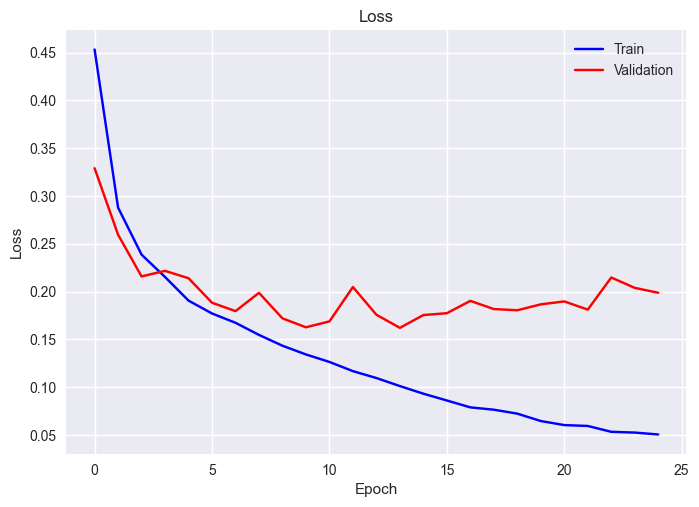

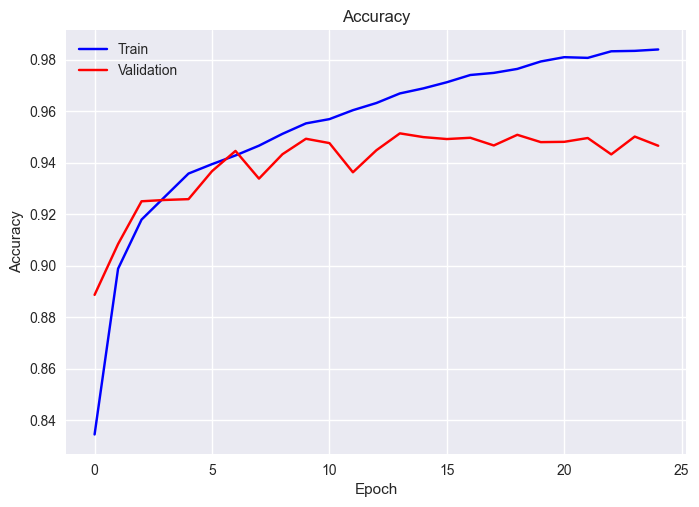

154/154 [==============================] - 6s 32ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    145041
           1       0.94      0.93      0.93      8651
           2       0.93      0.95      0.94     11320
           3       0.87      0.87      0.87     31348

    accuracy                           0.95    196360
   macro avg       0.93      0.93      0.93    196360
weighted avg       0.95      0.95      0.95    196360



In [40]:
plt.title('Loss')
plt.plot(lstm_model_hisotry.history['loss'], color='blue', label='train')
plt.plot(lstm_model_hisotry.history['val_loss'], color='red', label='validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()
plt.title('Accuracy')
plt.plot(lstm_model_hisotry.history['accuracy'], color='blue', label='train')
plt.plot(lstm_model_hisotry.history['val_accuracy'], color='red', label='validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()



y_val_pred = lstm_model.predict(x_val)
y_val_pred_flat = flatten_predictions(y_val_pred)
y_val_flat = flatten_predictions(y_val)
print(classification_report(y_val_pred_flat, y_val_flat))

# Generating predictions

In [41]:
biLSTM_model = load_model('lstm_model')
biLSTM_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 40, 400)          331200    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 40, 400)           0         
                                                                 
 lstm_5 (LSTM)               (None, 40, 100)           200400    
                                                                 
 dropout_5 (Dropout)         (None, 40, 100)           0         
                                                                 
 dense_4 (Dense)             (None, 40, 30)            3030      
                                                                 
 dense_5 (Dense)             (None, 40, 4)             124       
                                                      

# Developing test data files

In [42]:
all_x_files = glob.glob(path5 + "/subject_0**_*__x.csv")
all_x_time_files = glob.glob(path5 + "/subject_0**_*__x_time.csv")
all_y_time_files = glob.glob(path5 + "/subject_0**_*__y_time.csv")
li = []

print(sorted(all_x_files))
print(sorted(all_x_time_files))
print(sorted(all_y_time_files))

['TestData\\subject_009_01__x.csv', 'TestData\\subject_010_01__x.csv', 'TestData\\subject_011_01__x.csv', 'TestData\\subject_012_01__x.csv']
['TestData\\subject_009_01__x_time.csv', 'TestData\\subject_010_01__x_time.csv', 'TestData\\subject_011_01__x_time.csv', 'TestData\\subject_012_01__x_time.csv']
['TestData\\subject_009_01__y_time.csv', 'TestData\\subject_010_01__y_time.csv', 'TestData\\subject_011_01__y_time.csv', 'TestData\\subject_012_01__y_time.csv']


In [43]:
gen_files=[]
for filename in sorted(all_x_files):
    gen= filename[:-7]
    gen_files.append(gen)

print(gen_files)

subject_list=[]
for filename in gen_files:
    file=filename.split('\\')[1]
    print(file) 
    subject_list.append(file)

['TestData\\subject_009_01', 'TestData\\subject_010_01', 'TestData\\subject_011_01', 'TestData\\subject_012_01']
subject_009_01
subject_010_01
subject_011_01
subject_012_01


In [44]:
for filename in gen_files:
    subject=filename.split('\\')[1]
    df1=pd.read_csv(filename+'__x.csv',  names =['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
    df2=pd.read_csv(filename+'__x_time.csv', names =['time'])
    df1['time']=df2['time']
    df1['time']=df1['time'].apply(lambda x:int(x*100)/100)
    df1['time']=df1['time'].astype(str)
    df3=pd.read_csv(filename+'__y_time.csv', names =['time'])
    df3['time'].astype(str)
    df1.to_csv(path6+subject+'x_combined_time.csv',index=False)
    df3.to_csv(path6+subject+'y_time.csv',index=False)

In [45]:
x_test_009 = pd.read_csv(path6 + 'subject_009_01x_combined_time.csv')
x_test_010 = pd.read_csv(path6 + 'subject_010_01x_combined_time.csv')
x_test_011 = pd.read_csv(path6 + 'subject_011_01x_combined_time.csv')
x_test_012 = pd.read_csv(path6 + 'subject_012_01x_combined_time.csv')

x_test_009 = x_test_009.drop('time', axis=1)
x_test_010 = x_test_010.drop('time', axis=1)
x_test_011 = x_test_011.drop('time', axis=1)
x_test_012 = x_test_012.drop('time', axis=1)

In [46]:
x_test_009_scaled = scaler.transform(x_test_009)
x_test_009 = pd.DataFrame(x_test_009_scaled, columns = ['ax','ay','az','gx','gy','gz'])

x_test_010_scaled = scaler.transform(x_test_010)
x_test_010 = pd.DataFrame(x_test_010_scaled, columns = ['ax','ay','az','gx','gy','gz'])

x_test_011_scaled = scaler.transform(x_test_011)
x_test_011 = pd.DataFrame(x_test_011_scaled, columns = ['ax','ay','az','gx','gy','gz'])

x_test_012_scaled = scaler.transform(x_test_012)
x_test_012 = pd.DataFrame(x_test_012_scaled, columns = ['ax','ay','az','gx','gy','gz'])

In [47]:
def define_test_windows(df_x, windowsize=40):
  window_x=[]
  for i in range(0, len(df_x)-windowsize, windowsize):
    window_x.append([df_x.values[i:i+windowsize]])
  window_x=np.array(window_x).reshape(-1,windowsize,6)
  
  return window_x


In [48]:
x_09 = define_test_windows(x_test_009, wsize)
x_10 = define_test_windows(x_test_010, wsize)
x_11 = define_test_windows(x_test_011, wsize)
x_12 = define_test_windows(x_test_012, wsize)

In [49]:
y_pred_009 = biLSTM_model.predict(x_09)
y_pred_010 = biLSTM_model.predict(x_10)
y_pred_011 = biLSTM_model.predict(x_11)
y_pred_012 = biLSTM_model.predict(x_12)

y_009 = y_pred_009.tolist()
yhat_009 = flatten_predictions(y_009)
y_010 = y_pred_010.tolist()
yhat_010 = flatten_predictions(y_010)
y_011 = y_pred_011.tolist()
yhat_011 = flatten_predictions(y_011)
y_012 = y_pred_012.tolist()
yhat_012 = flatten_predictions(y_012)


In [51]:
yhat_009_df=pd.DataFrame(yhat_009, columns=['label'])
yhat_010_df=pd.DataFrame(yhat_010, columns=['label'])
yhat_011_df=pd.DataFrame(yhat_011, columns=['label'])
yhat_012_df=pd.DataFrame(yhat_012, columns=['label'])

In [53]:
x_combined9 = pd.read_csv(path6 + 'subject_009_01x_combined_time.csv')
x_combined10 = pd.read_csv(path6 + 'subject_010_01x_combined_time.csv')
x_combined11 = pd.read_csv(path6 + 'subject_011_01x_combined_time.csv')
x_combined12 = pd.read_csv(path6 + 'subject_012_01x_combined_time.csv')

In [54]:
x_combined9 = x_combined9.join(yhat_009_df, how='left')
x_combined10 = x_combined10.join(yhat_010_df, how='left')
x_combined11 = x_combined11.join(yhat_011_df, how='left')
x_combined12 = x_combined12.join(yhat_012_df, how='left')

x_combined9['label'] = x_combined9['label'].fillna(0)
x_combined10['label'] = x_combined10['label'].fillna(0)
x_combined11['label'] = x_combined11['label'].fillna(0)
x_combined12['label'] = x_combined12['label'].fillna(0)

In [55]:
y_time_009 = pd.read_csv(path6 + 'subject_009_01y_time.csv')
y_time_010 = pd.read_csv(path6 + 'subject_010_01y_time.csv')
y_time_011 = pd.read_csv(path6 + 'subject_011_01y_time.csv')
y_time_012 = pd.read_csv(path6 + 'subject_012_01y_time.csv')

In [56]:
xcombinedfinal9 = pd.merge(x_combined9, y_time_009, on='time', how='inner')
xcombinedfinal10 = pd.merge(x_combined10, y_time_010, on='time', how='inner')
xcombinedfinal11 = pd.merge(x_combined11, y_time_011, on='time', how='inner')
xcombinedfinal12 = pd.merge(x_combined12, y_time_012, on='time', how='inner')

In [57]:
# Change the test result directory before running this cell
xcombinedfinal9['label'].to_csv(path7 + "subject_009_01__y.csv", index=False, header=False)
xcombinedfinal10['label'].to_csv(path7 + "subject_010_01__y.csv", index=False, header=False)
xcombinedfinal11['label'].to_csv(path7 + "subject_011_01__y.csv", index=False, header=False)
xcombinedfinal12['label'].to_csv(path7 + "subject_012_01__y.csv", index=False, header=False)